In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [3]:
digits=pd.read_pickle('~/digits.pkl')

In [22]:
digits.columns
digits['Value'].value_counts(dropna=False)
othercols=digits.columns.drop('Value')
mask=digits[othercols].isna().any(axis=1)
digits[mask]
# No NAs except in the Value column where we expect them

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Value


In [24]:
pd.set_option('display.max_columns', None)
digits.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Value
count,1400.0,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,50.000000
mean,0.0,0.290000,5.172857,11.781429,12.011429,5.892857,1.437143,0.147143,0.007143,1.980000,10.364286,11.910000,10.322143,8.324286,1.913571,0.122143,0.003571,2.637143,9.840000,6.825714,7.026429,7.751429,1.834286,0.059286,0.001429,2.500000,9.120714,8.746429,10.007857,7.470714,2.287857,0.002857,0.0,2.277857,7.735000,9.097857,10.330714,8.688571,2.819286,0.0,0.009286,1.561429,6.903571,7.090000,7.597857,8.162143,3.517143,0.032143,0.009286,0.726429,7.550714,9.442143,9.202857,8.584286,3.815714,0.240714,0.000714,0.266429,5.537857,12.085714,11.990714,7.027857,2.302857,0.435000,4.540000
std,0.0,0.871378,4.721566,4.287982,4.202336,5.646605,3.446774,1.090504,0.106704,3.124695,5.461295,3.980174,4.696942,6.008261,3.646117,0.869676,0.070646,3.582348,5.699915,5.839250,6.143973,6.162877,3.387902,0.476825,0.037783,3.159112,6.181586,5.885188,6.165047,5.888334,3.726055,0.053395,0.0,3.382133,6.238223,6.296441,5.919756,5.808735,3.499135,0.0,0.157897,2.895946,6.516707,6.362454,6.248064,5.720447,4.436639,0.344002,0.231351,1.834508,5.628631,5.178398,5.362912,5.934962,5.003248,1.056610,0.026726,0.880096,5.071892,4.329670,4.882821,5.989979,4.357963,2.048393,3.051998
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,13.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.500000,0.000000,0.000000,5.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,15.000000,15.000000,14.000000,2.000000,

##### Seems weird that column 32,39 are all zeros. There are many other columns which appear to be mostly zeros with maybe only a few other values. Generally the ranges are similarly, tho some columns tend to be closer to zero and some tend to be higher. I am not sure that there are outliers. There are some columns which are all zero except for a max which could be outliers but it could just be that for most numbers that pixel is background and for maybe one number it isn't.

In [25]:
X=digits[othercols]
Y=digits['Value']

In [29]:
X=np.asarray(X)
Y=np.asarray(Y)

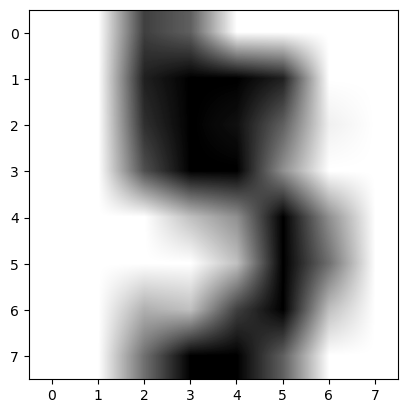

In [37]:
plt.imshow(X[5].reshape(8, 8), cmap="binary",
interpolation="bilinear")
plt.show()

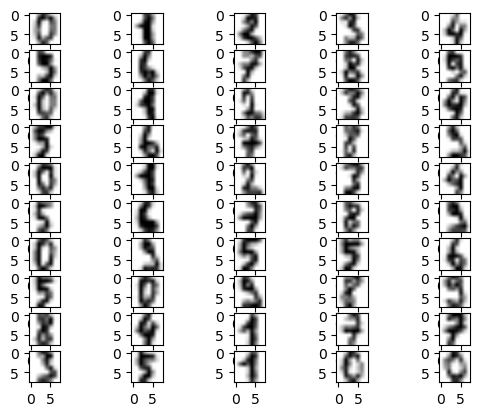

In [40]:
fig,axs=plt.subplots(nrows=10,ncols=5)
for i in range(50):
    if i<5:
        axs[0,i].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 5<=i<10:
        axs[1,i-5].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 10<=i<15:
        axs[2,i-10].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 15<=i<20:
        axs[3,i-15].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 20<=i<25:
        axs[4,i-20].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 25<=i<30:
        axs[5,i-25].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 30<=i<35:
        axs[6,i-30].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 35<=i<40:
        axs[7,i-35].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 40<=i<45:
        axs[8,i-40].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 45<=i<50:
        axs[9,i-45].imshow(X[i].reshape(8, 8), cmap="binary",
interpolation="bilinear")
        
plt.show()

In [42]:
Y[0:50]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 9., 5., 5.,
       6., 5., 0., 9., 8., 9., 8., 4., 1., 7., 7., 3., 5., 1., 0., 0.])

In [44]:
model=LogisticRegression(solver='liblinear')
model.fit(X[0:50],Y[0:50])

LogisticRegression(solver='liblinear')

In [47]:
digits_labeled=pd.read_pickle('~/digits_labeled.pkl')
othercols=digits_labeled.columns.drop('Value')
Xtest=digits_labeled[othercols]
Ytest=digits_labeled['Value']
Xtest=np.asarray(Xtest)
Ytest=np.asarray(Ytest)

In [51]:
ypred=model.predict(Xtest)
accuracy_score(Ytest,ypred)

0.8666666666666667

In [105]:
kmeans = KMeans(n_clusters = 50, random_state = 0, n_init='auto')
x_transf=kmeans.fit_transform(X[0:50])

In [106]:
reps=[]
for i in range(50):
    reps.append(int(np.where(x_transf[i]==min(x_transf[i]))[0]))

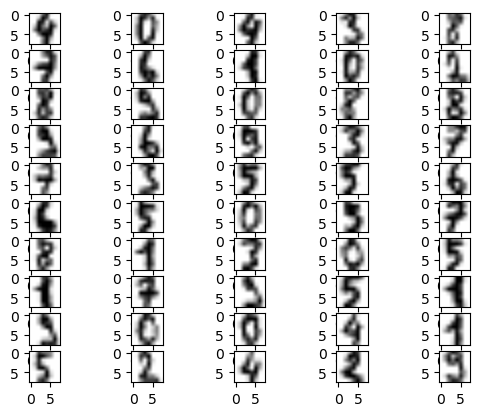

In [107]:
reps #representative images
fig,axs=plt.subplots(nrows=10,ncols=5)
for i in range(50):
    if i<5:
        axs[0,i].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 5<=i<10:
        axs[1,i-5].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 10<=i<15:
        axs[2,i-10].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 15<=i<20:
        axs[3,i-15].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 20<=i<25:
        axs[4,i-20].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 25<=i<30:
        axs[5,i-25].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 30<=i<35:
        axs[6,i-30].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 35<=i<40:
        axs[7,i-35].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 40<=i<45:
        axs[8,i-40].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
    elif 45<=i<50:
        axs[9,i-45].imshow(X[reps[i]].reshape(8, 8), cmap="binary",
interpolation="bilinear")
        
plt.show()

In [117]:
labels=[4,0,4,3,8,7,6,4,0,2,8,9,0,8,8,9,6,9,3,7,7,3,5,5,6,6,5,0,5,7,8,1,3,0,5,1,7,3,5,1,9,0,0,4,1,5,2,4,2,5]


In [118]:
model=LogisticRegression(solver='liblinear')
model.fit(np.array(X[reps]),labels)
ypred=model.predict(Xtest)
accuracy_score(Ytest,ypred)

0.8

##### I actually have worse accuracy using the clusters. I am not sure whether I labeled poorly or did something wrong.